In [ ]:
# LoRA + ControlNet + Canny + Stable Diffusion (Colab-ready pipeline)

# ----------------------------------------------
# ✅ 1. Install dependencies
# ----------------------------------------------
!pip install -q diffusers transformers accelerate opencv-python safetensors
!pip install -q git+https://github.com/huggingface/diffusers.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Mount Google Drive (optional, for saving model checkpoints)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# ----------------------------------------------
# ✅ 2. Import libraries
# ----------------------------------------------
import torch
import os
import numpy as np
import cv2
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, StableDiffusionPipeline
from diffusers.utils import load_image
from IPython.display import display


In [ ]:
# ----------------------------------------------
# ✅ 3. Load ControlNet model (Canny-based)
# ----------------------------------------------
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
# Load base model
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    revision="fp16",
    safety_checker=None
).to("cuda")

# Optionally load LoRA weights
# (Assumes LoRA weights are already trained and available at this path)
pipe.load_lora_weights("/content/drive/MyDrive/data/datasets/beachybeach_lora_model/")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_contr

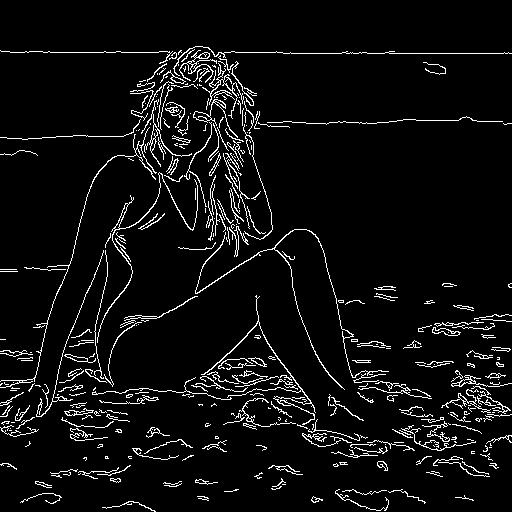

In [ ]:
# ----------------------------------------------
# ✅ 4. Create Canny image from a reference image
# ----------------------------------------------
def get_canny_image(image: Image.Image) -> Image.Image:
    image = np.array(image)
    image = cv2.Canny(image, 100, 200)
    image = Image.fromarray(image)
    return image.convert("RGB")

# Load your reference image (from LoRA-trained outputs or upload manually)
reference_image_path = "/content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_3.png"  # Replace with your image
ref_image = Image.open(reference_image_path).convert("RGB")
canny_image = get_canny_image(ref_image)
display(canny_image)

  0%|          | 0/30 [00:00<?, ?it/s]

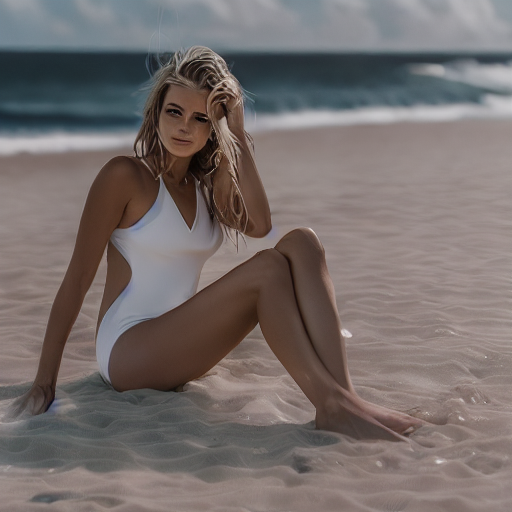

  0%|          | 0/30 [00:00<?, ?it/s]

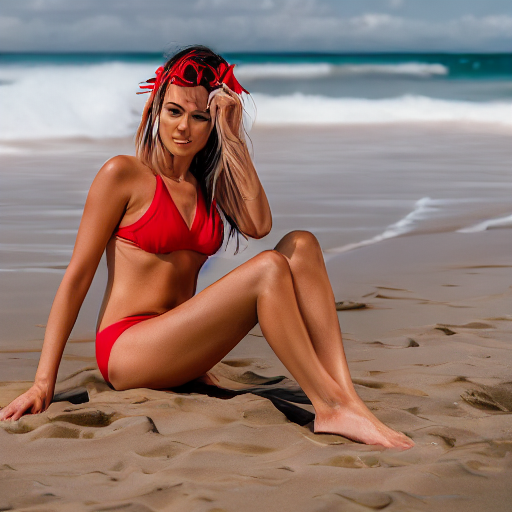

  0%|          | 0/30 [00:00<?, ?it/s]

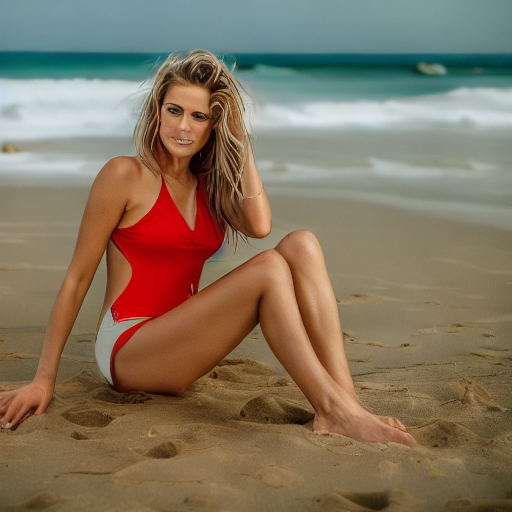

  0%|          | 0/30 [00:00<?, ?it/s]

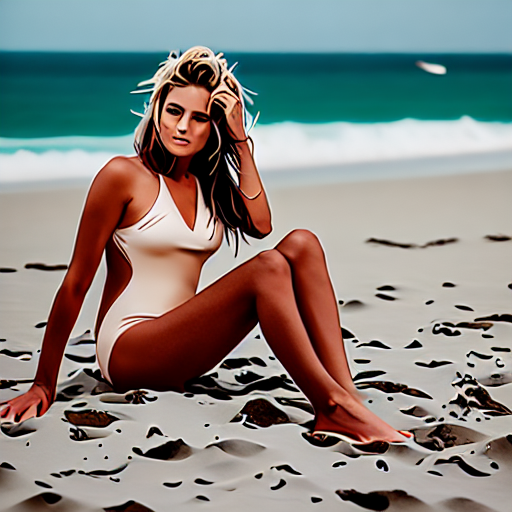

✅ Generation complete. Images saved to /content/generated_controlnet


In [ ]:
# ----------------------------------------------
# ✅ 5. Generate new images with ControlNet guidance
# ----------------------------------------------
prompt = "a photo of sksbbx beachybeach standing on a beach with in neutral mood in red bikini"
images = []

for i in range(4):
    generator = torch.manual_seed(i)
    output = pipe(
        prompt,
        image=canny_image,
        num_inference_steps=30,
        generator=generator,
        controlnet_conditioning_scale=1.0  # Adjust to control influence
    )
    image = output.images[0]
    images.append(image)
    display(image)

    # # Save image
    # os.makedirs("/content/generated_controlnet", exist_ok=True)
    # image.save(f"/content/generated_controlnet/beachybeach_controlnet_{i}.png")

print("✅ Generation complete. Images saved to /content/generated_controlnet")
